# Mugloest - 6 ADCP Experiment (March, 2013) 

# Merge ADCP and CTs
## Pickle dictionary (ADCP/CT)
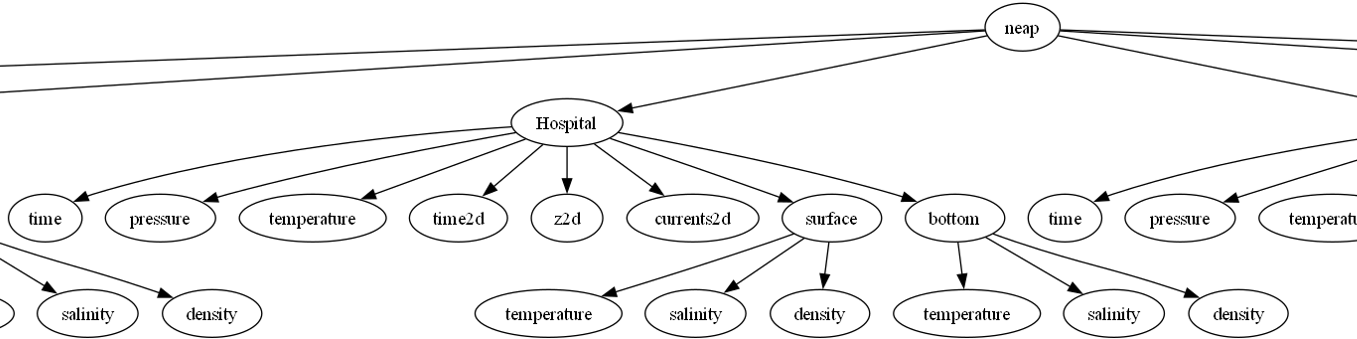

--> No final do notebook tem a verificação se os dados estão corretos, no sentiod que a temperatura do CT de Fundo tem que ser muito parecida com a temperatura do ADCP! Está tudo Ok... 

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from pprint import pprint
import seawater as sea

In [2]:
with open('dic_adcp.pkl', 'rb') as io:
    adcps = pickle.load(io)

with open('dic_cts.pkl', 'rb') as io:
    cts = pickle.load(io)  

campaigns = ['neap', 'spring']
stations = ['Praticagem', 'PF', 'Hospital', 'Rampa', 'Bombeiros', 'JoanaBezerra']
levels = ['surface', 'bottom']

## Check ADCP keys

In [3]:
for c in adcps:
    print(c)
print('')
for c in adcps['neap']:
    print(c)
print('')
for c in adcps['neap']['PF']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d


In [4]:
print(adcps['neap']['PF'].keys())
print(cts['neap']['PF'].keys())

dict_keys(['time', 'pressure', 'temperature', 'time2d', 'z2d', 'currents2d'])
dict_keys(['surface', 'bottom'])


In [5]:
adcps[campaigns[0]][stations[0]].keys()

dict_keys(['time', 'pressure', 'temperature', 'time2d', 'z2d', 'currents2d'])

## Add the data from the CTS in the ADCP dictionary (temperature, salinity and density)

In [6]:
for campaign in campaigns:
    for station in stations:
        for level in levels:
            if level not in adcps[campaign][station]:  #chatgpt
                adcps[campaign][station][level] = {}
                
            time_ct = cts[campaign][station][level][:,0]
            temperature = cts[campaign][station][level][:,1]
            salinity = cts[campaign][station][level][:,2]

            time_adcp = adcps[campaign][station]['time']

            time_ct_n = mdates.date2num(time_ct)
            time_adcp_n = mdates.date2num(time_adcp)

            temperature = np.array(temperature, dtype='float64')
            salinity = np.array(salinity, dtype='float64')
            
            temp_i = np.interp(time_adcp_n, time_ct_n, temperature)
            sal_i = np.interp(time_adcp_n, time_ct_n, salinity)
            rho = sea.dens(sal_i, temp_i, 1)

            adcps[campaign][station][level]['temperature'] = temp_i
            adcps[campaign][station][level]['salinity'] = sal_i
            adcps[campaign][station][level]['density'] = rho
            

In [7]:
for c in adcps:
    print(c)
print('')
for c in adcps['neap']:
    print(c)
print('')
for c in adcps['neap']['PF']:
    print(c)
print('')
for c in adcps['neap']['PF']['surface']:
    print(c)

neap
spring

Praticagem
PF
Hospital
Rampa
Bombeiros
JoanaBezerra

time
pressure
temperature
time2d
z2d
currents2d
surface
bottom

temperature
salinity
density


In [8]:
with open('Muglo_6ADCP_CT_dic.pkl','wb') as io:
    pickle.dump(adcps, io)

# To visualize the dictionary structure graphically
## Figure in the header

In [9]:
# from graphviz import Digraph

# def dict_only_structure(d):
#     return {k: dict_only_structure(v) if isinstance(v, dict) else {} for k, v in d.items()}

# def visualize_dict_tree(data, graph=None, parent_name=''):
#     if graph is None:
#         graph = Digraph(comment='Dictionary Tree')

#     for key, value in data.items():
#         node_name = f"{parent_name}_{key}" if parent_name else key
#         graph.node(node_name, label=str(key))

#         if parent_name:
#             graph.edge(parent_name, node_name)

#         if isinstance(value, dict):
#             visualize_dict_tree(value, graph, node_name)
#         else:
#             value_node_name = f"{node_name}_value"
#             graph.node(value_node_name, label=str(value), shape='box')
#             graph.edge(node_name, value_node_name)
#     return graph

# adcp2 = dict_only_structure(adcps)
# dot = visualize_dict_tree(adcp2)
# dot.render('dictionary_tree', view=True, format='png') # Renders to PNG and opens

In [10]:
# bunch = [time2d, z2d, curr, press, time, temp_s, sal_s, temp_f, sal_f, rho_s, rho_f]

# Compares the temperature measure by ADCP and CT to check if they fit... same mooring!
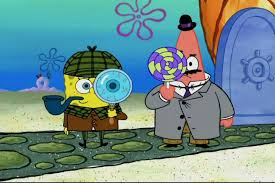

# Neap

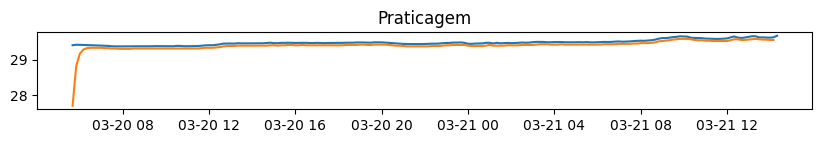

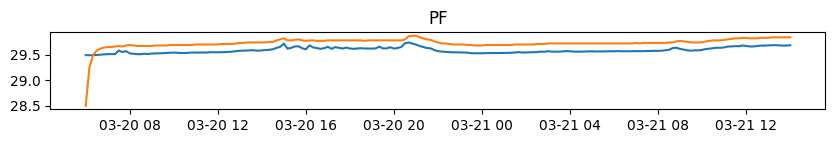

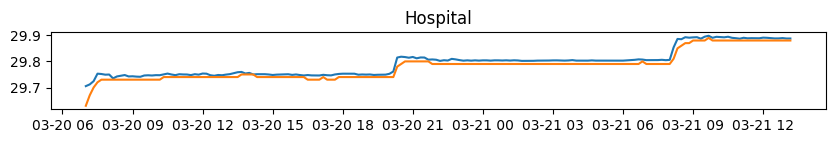

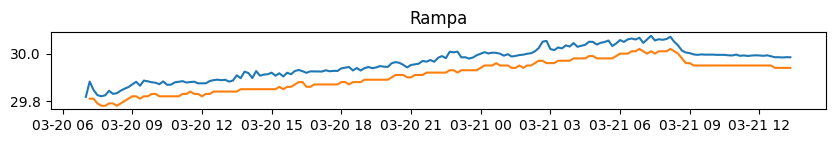

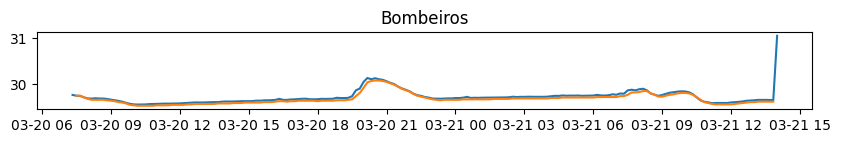

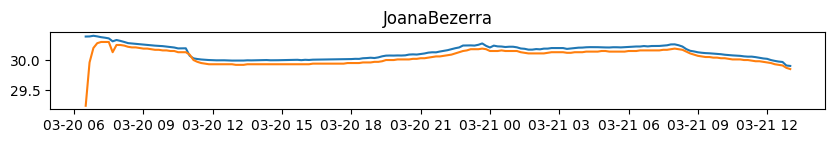

In [11]:
for i in range(6):
    ct_time = cts['neap'][stations[i]]['bottom'][:,0]
    ct_temperature = cts['neap'][stations[i]]['bottom'][:,1]

    adcp_time = adcps['neap'][stations[i]]['time']
    adcp_temperature = adcps['neap'][stations[i]]['temperature']
    plt.figure(figsize=(10,1))
    plt.plot(ct_time, ct_temperature)
    plt.plot(adcp_time, adcp_temperature)
    plt.title(stations[i])
    plt.show()

# Spring

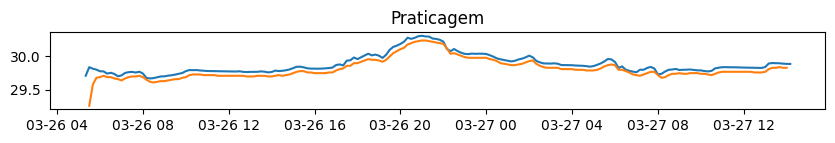

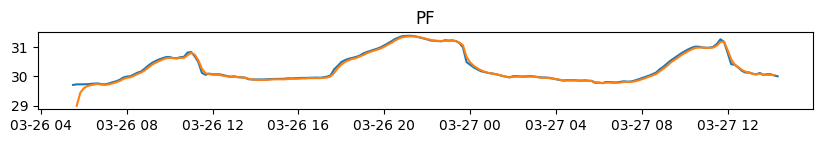

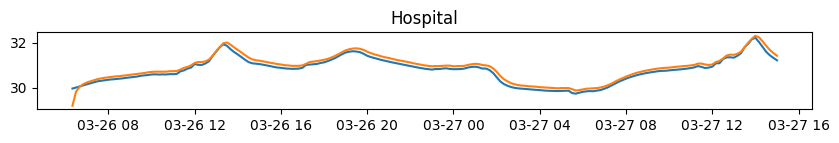

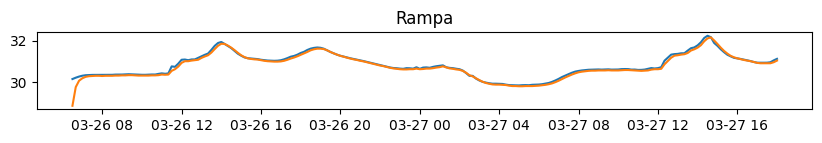

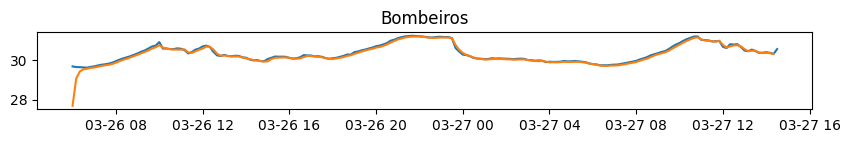

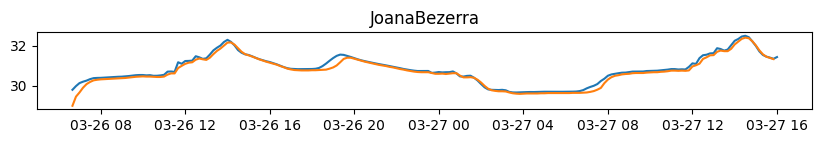

In [12]:
for i in range(6):
    ct_time = cts['spring'][stations[i]]['bottom'][:,0]
    ct_temperature = cts['spring'][stations[i]]['bottom'][:,1]

    adcp_time = adcps['spring'][stations[i]]['time']
    adcp_temperature = adcps['spring'][stations[i]]['temperature']
    plt.figure(figsize=(10,1))
    plt.plot(ct_time, ct_temperature)
    plt.plot(adcp_time, adcp_temperature)
    plt.title(stations[i])
    plt.show()